*Antonio Coín Castro*

# Métodos Avanzados en Estadística

## Relación 3.1: regresión

In [30]:
library(ggplot2)
library(gridExtra)
library(glmnet)

### Ejercicio 1

Los datos del fichero [Datos-geyser.txt](https://matematicas.uam.es/~joser.berrendero/datos/Datos-geyser.txt) corresponden al día de la observación (primera columna $D$), el tiempo medido en minutos (segunda columna $Y$) y el tiempo hasta la siguiente erupción (tercera  columna $X$) del geyser *Old Faithful* en el parque norteamericano de Yellowstone.

**a)** Representa gráficamente los datos, junto con el estimador de Nadaraya-Watson de la función de regresión de $Y$ sobre $X$.

En primer lugar, cargamos los datos en un `data.frame`.

In [2]:
df <- read.table("https://matematicas.uam.es/~joser.berrendero/datos/Datos-geyser.txt", 
                 header = T)
head(df)

,D,Y,X
,<int>,<int>,<dbl>
1,1,78,4.4
2,1,74,3.9
3,1,68,4.0
4,1,76,4.0
5,1,80,3.5
6,1,84,4.1


Echamos un vistazo a los datos, representando las tres posibles parejas de variables $(D, Y, X)$.

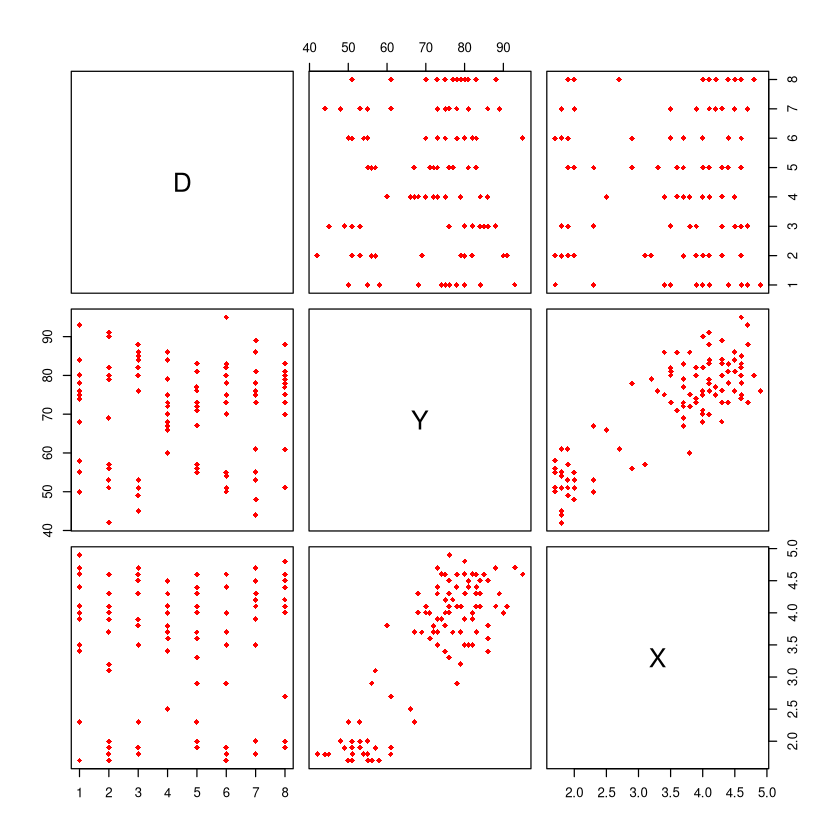

In [3]:
pairs(df, col="red", pch=18)

Representamos ahora $Y$ frente a $X$ junto con el estimador de Nadaraya-Watson de la función de regresión de $Y$ sobre $X$. Para ello utilizamos el método de suavizado `loess` dentro de `geom_smooth()`, especificando que el grado sea $0$. Fijamos el parámetro de suavizado `span` por ejemplo a $0.4$, y suprimimos los intervalos de confianza con `se=F`.

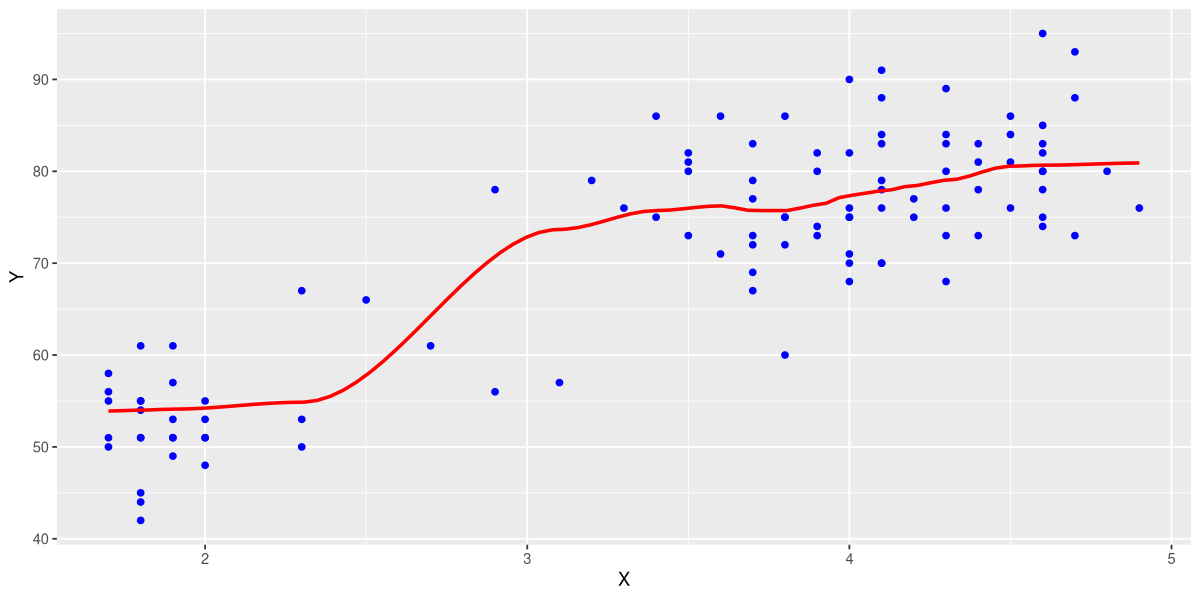

In [4]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(df, aes(X, Y)) + 
    geom_point(color="blue") +
    geom_smooth(formula=y ~ x, method='loess', method.args=list(degree=0), 
                span = 0.4, se=FALSE, col='red')

**b)** Representa gráficamente los datos, junto con el estimador localmente lineal de la función de regresión de $Y$ sobre $X$.

Volvemos a representar $Y$ frente a $X$, esta vez acompañado del estimador localmente lineal de la función de regresión de $Y$ sobre $X$. Para ello utilizamos de nuevo el método `loess`, especificando esta vez que el grado del polinomio subyacente es $1$.

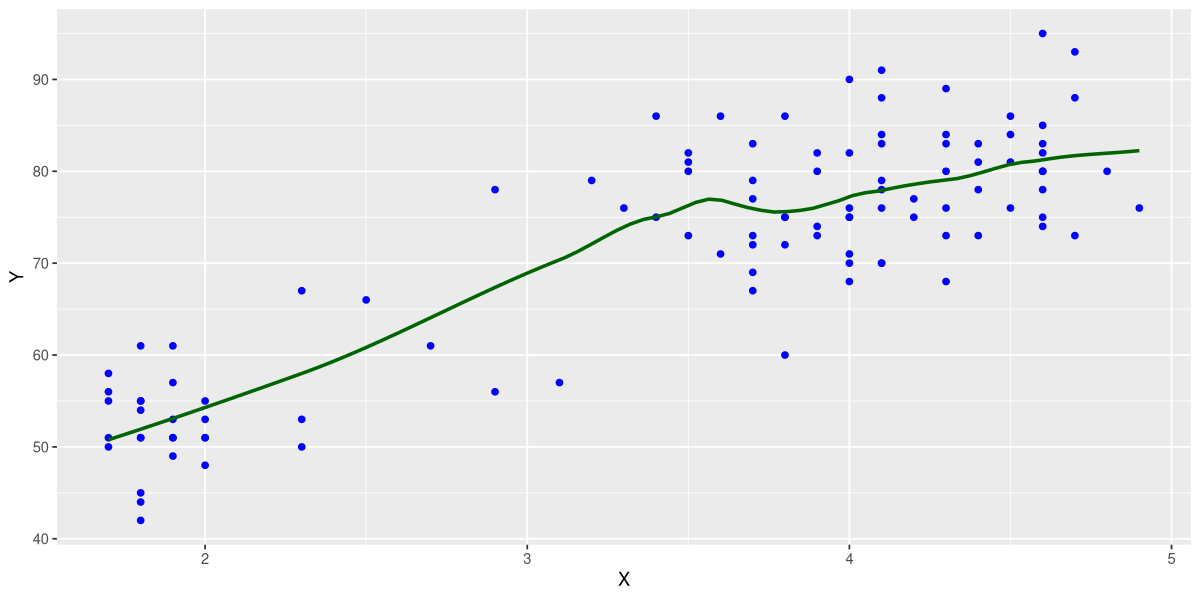

In [5]:
ggplot(df, aes(X, Y)) + 
    geom_point(color="blue") +
    geom_smooth(formula=y ~ x, method='loess', method.args=list(degree=1), 
                span = 0.4, se=FALSE, col='darkgreen')

Finalmente podemos pintar en la misma gráfica los dos estimadores. Observamos que el estimador localmente lineal tiene un comportamiento ligeramente más suave que el de Nadaraya-Watson.

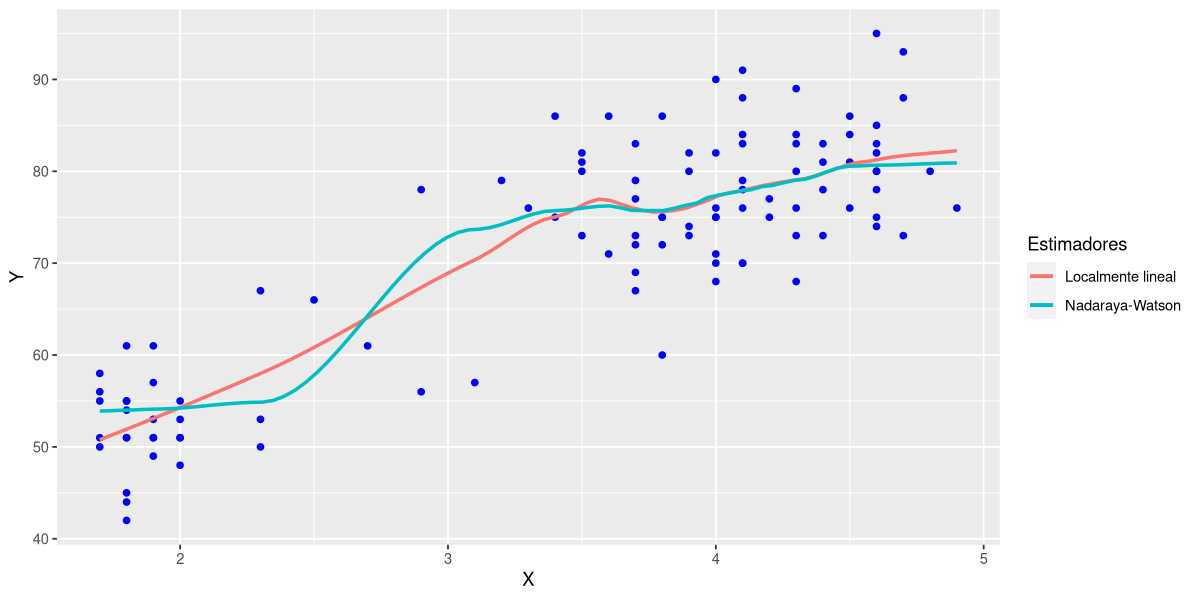

In [6]:
ggplot(df, aes(X, Y)) + 
    geom_point(color="blue") +
    geom_smooth(aes(colour="Localmente lineal"), formula=y ~ x, method='loess', 
                method.args=list(degree=1), span = 0.4, se=FALSE) +
    geom_smooth(aes(colour="Nadaraya-Watson"), formula=y ~ x, method='loess', 
                method.args=list(degree=0), span = 0.4, se=FALSE) +
    scale_color_discrete(name = "Estimadores")

### Ejercicio 4

Se considera el siguiente modelo de regresión lineal múltiple:

\begin{equation}\label{eq:4} 
\tag{1}
Y_i=\beta_0 +\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3}+\epsilon_i,\ \ \epsilon_i\sim \mathcal N(0,\sigma^2),\ \ i=1,\dots,n.
\end{equation}

Se dispone de $n=20$ observaciones con las que se ajustan todos los posibles submodelos del modelo \eqref{eq:4}, obteniéndose para cada uno de ellos las siguientes sumas de cuadrados de los residuos (todos los submodelos incluyen un término independiente):


| Variables incluidas en el modelo | SCR | 
|:--------------------------------:|:---:|
| Término independiente | 42644.00 |
| $x_1$ | 8352.28 |
| $x_2$ | 36253.69 |
| $x_3$ | 36606.19 |
| $x_1$ y $x_2$ | 7713.13 |
| $x_1$ y $x_3$ | 762.55 |
| $x_2$ y $x_2$ | 32700.17 |
| $x_1$, $x_2$ y $x_3$ | 761.41 |

**a)** Calcula la tabla de análisis de la varianza para el modelo $\eqref{eq:4}$ y constrasta a nivel $\alpha=0.05$ la hipótesis nula $H_0: \beta_1=\beta_2=\beta_3=0$.

Para calcular la tabla de análisis de la varianza para el modelo completo solo nos falta conocer cuál es la suma de cuadrados explicada, $SCE$. Podemos deducir esta cantidad de los datos que tenemos, recordando que para un modelo constante $Y_i = \beta_0 + \epsilon_i$, el valor de $\beta_0$ que minimiza el error cuadrático medio entre predicciones y valores observados es $\hat\beta_0=\bar Y$. En ese caso, si restamos la suma de cuadrados de los residuos del modelo que tiene únicamente el término independiente (digamos $SCR_0$) menos la $SCR$ total, obtenemos la $SCE$ del modelo completo:

$$SCR_0 - SCR = \sum_i(\hat \beta_0 - Y_i)^2 - \sum_i(\hat Y_i - Y_i)^2=\sum_i (\bar Y-Y_i)^2 - \sum_i(\hat Y_i - Y_i)^2= SCT - SCR = SCE.$$

In [7]:
n <- 20
p <- 3
scrs <- c(42644, 8352.28, 36253.69, 36606.19, 7713.13, 762.55, 32700.17, 761.41)
scr <- scrs[8]
sce <- scrs[1] - scr

source <- c("Model", "Residuals")
df <- c(p, n - p - 1)
sum_sq <- c(sce, scr)
mean_sq <- sum_sq/df
f <- c(mean_sq[1]/mean_sq[2], NA)
pr_f <- c(pf(f[1], df1=p, df2=n-p-1, lower.tail=F), NA)

anova_table <- data.frame(Source=source, Df=df, Sum_Sq=sum_sq, Mean_Sq=mean_sq, F=f, Pvalue=pr_f)
anova_table

Source,Df,Sum_Sq,Mean_Sq,F,Pvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,3,41882.59,13960.86333,293.3686,3.421043e-14
Residuals,16,761.41,47.58812,NA,NA


El estadítisco $F$ que nos interesta para contrastar $H_0$ es

$$F=\frac{SCE/3}{SCR/16},$$

que bajo $H_0$ sabemos que sigue una distribución $F_{3;16}$. Como el $p$-valor obtenido con nuestros datos es $p=\mathbb P[F_{3;16} > F]=3.42\cdot 10^{-14} \ll \alpha=0.05$, podemos rechazar la hipótesis nula de que todos los coeficientes salvo el término independiente son $0$.

**b)** En el modelo $\eqref{eq:4}$, contrasta a nivel $\alpha=0.05$ las dos hipótesis nulas siguientes:

- $H_0: \beta_2=0$.
- $H_0: \beta_1=\beta_3=0$.

En cada caso, el estimador que nos interesa es

$$F=\frac{(SCR_0 - SCR)/k}{SCR/(n-p-1)},$$

donde $n$ es el número de observaciones, $p$ el número de variables del modelo completo, y $k$ el número de filas de la matriz $A$ (de rango $k$) que verifica $H_0: A\boldsymbol{\beta}=0$. El valor $SCR_0$ es la suma de cuadrados de los residuos del modelo ajustado bajo la hipótesis nula.

Sabemos que bajo $H_0$, el estadístico $F$ anterior tiene una distribución $F_{k;n-p-1}$.

**Caso $\boldsymbol{H_0: \beta_2=0}$**

En este caso, se tiene que

$$A=\begin{pmatrix} 0 & 0 & 1 & 0\end{pmatrix},$$

y por tanto $k=1$. Mirando en la tabla del enunciado podemos calcular el valor de $F$:

In [8]:
k <- 1
f <- ((scrs[6] - scr)/k) / (scr/(n-p-1))
pvalue <- pf(f, df1=k, df2=n-p-1,lower.tail=F)
cat("p-value:", pvalue)

p-value: 0.8789337

Como obtenemos un $p$-valor de $\approx 0.88 > 0.05=\alpha$, concluimos que no tenemos evidencia suficiente para rechazar la hipótesis nula de que la segunda variable no es significativa en la predicción.

**Caso $\boldsymbol{H_0: \beta_1=\beta_3=0}$**

Tenemos que

$$A=\begin{pmatrix} 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\end{pmatrix},$$

y por tanto $k=2$.

In [9]:
k <- 2
f <- ((scrs[3] - scr)/k) / (scr/(n-p-1))
pvalue <- pf(f, df1=k, df2=n-p-1,lower.tail=F)
cat("p-value:", pvalue)

p-value: 3.785566e-14

En este caso el $p$-valor es $\approx 3.79\cdot 10^{-14} \ll 0.05=\alpha$, por lo que rechazamos la hipótesis nula de que tanto $\beta_1$ como $\beta_3$ no son relevantes en la predicción.

### Ejercicio 5

Tres vehículos se encuentran situados en los puntos $0<\beta_1<\beta_2<\beta_3$ de una carretera recta. Para estimar la posición de los vehículos se toman las siguientes medidas (todas ellas sujetas a errores aleatorios de medición independientes con distribución normal de media $0$ y varianza $\sigma^2$):

- Desde el punto $0$ medimos las distancias a los tres vehículos, dando $Y_1$, $Y_2$ e $Y_3$.
- Nos trasladamos al primer vehículo y medimos las distancias a los otros dos, dando dos nuevas medidas $Y_4$ e $Y_5$.
- Nos trasladamos al segundo vehículo y medimos la distancia al tercero, dando una medida adicional $Y_6$.

**a)** Expresa el problema de estimación como un modelo de regresión múltiple indicando claramente cuál es la matriz de diseño.

Planteamos el problema como un modelo de regresión, donde pretendemos estimar los valores $\beta_i$ a partir de las variables de respuesta ($Y_i$) a las mediciones desde los distintos puntos de la carretera, teniendo en cuenta los errores a los que están sujetas estas últimas. En concreto, el modelo sería el siguiente, donde $X$ es la matriz de diseño:

$$
\begin{pmatrix}Y_1\\Y_2\\Y_3\\Y_4\\Y_5\\Y_6\end{pmatrix}
= \overbrace{\begin{pmatrix}1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
-1 & 1 & 0\\
-1 & 0 & 1\\
0 & -1 & 1\end{pmatrix}}^{X}\begin{pmatrix}\beta_1\\\beta_2\\\beta_3\end{pmatrix} + \begin{pmatrix}\epsilon_1\\\epsilon_2\\\epsilon_3\\\epsilon_4\\\epsilon_5\\\epsilon_6\end{pmatrix}, \quad \epsilon_i \sim \mathcal N(0, \sigma^2).
$$

Podemos escribirlo también de forma matricial, aprovechando que los errores son normales e independientes (y que por tanto de forma conjunta siguen una normal multivariante):
$$
\mathbf{Y}=X\boldsymbol{\beta} + \boldsymbol \epsilon, \quad \boldsymbol \epsilon \sim \mathcal N_6(\mathbf{0}, \sigma^2I).
$$

**b)** Calcula la distribución del estimador de mínimos cuadrados del vector de posiciones $(\beta_1, \beta_2, \beta_3)'$.

Aplicando la propiedad de transformaciones lineales de la normal multivariante a la expresión matricial anterior, se deduce que $\mathbf{Y}\sim \mathcal N_6(X\boldsymbol{\beta}, \sigma^2I)$. Por otro lado, ya hemos visto que la expresión del estimador de mínimos cuadrados de $\boldsymbol \beta$, que se obtiene como solución de las llamadas ecuaciones normales, es:
$$\hat{\boldsymbol \beta} = (X'X)^{-1}X'\mathbf{Y}.$$

Aplicando de nuevo la propiedad de transformaciones lineales, y teniendo en cuenta que la matriz $X'X$ es simétrica, concluimos que:
$$\hat{\boldsymbol \beta}\sim \mathcal N_3((X'X)^{-1}X'X\boldsymbol \beta, \sigma^2X((X'X)^{-1})'(X'X)^{-1}X')\equiv \mathcal N_3(\boldsymbol\beta, \sigma^2 (X'X)^{-1}).$$

Haciendo las cuentas, se tiene que:
$$X'X=\begin{pmatrix}1 & 0 & 0 &-1 & -1 & 0\\
0 & 1 & 0 & 1 & 0 & -1\\0 & 0 & 1 & 0 & 1 & 1\end{pmatrix}\begin{pmatrix}1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
-1 & 1 & 0\\
-1 & 0 & 1\\
0 & -1 & 1\end{pmatrix}=\begin{pmatrix}3&-1&-1\\-1 & 3 & -1\\-1 & -1 & 3\end{pmatrix}.$$

$$(X'X)^{-1}=\begin{pmatrix}3&-1&-1\\-1 & 3 & -1\\-1 & -1 & 3\end{pmatrix}^{-1}=\begin{pmatrix}1/2&1/4&1/4\\1/4 & 1/2 & 1/4\\1/4 & 1/4 & 1/2\end{pmatrix}.$$

Por tanto, la distribución de $\hat{\boldsymbol\beta}$ es:

$$\begin{pmatrix}\hat\beta_1\\\hat\beta_2\\\hat\beta_3\end{pmatrix}\sim \mathcal N_3\left(\begin{pmatrix}\beta_1\\\beta_2\\\beta_3\end{pmatrix}, \sigma^2\begin{pmatrix}1/2&1/4&1/4\\1/4 & 1/2 & 1/4\\1/4 & 1/4 & 1/2\end{pmatrix}\right).$$

Destacamos de aquí que el estimador $\hat{\boldsymbol{\beta}}$ es insesgado, que $Var(\hat\beta_i)=\sigma^2/2, \ i=1,2,3$, y que las covarianzas cruzadas son $Cov(\hat \beta_i, \hat \beta_j)=\sigma^2/4, \ i\neq j$. Aunque a priori las medidas $Y_4, Y_5$ e $Y_6$ pudieran parecer reduntantes, se comprueba que contribuyen a reducir la varianza del estimador (si solo tuviéramos las tres primeras medidas, la varianza en cada caso sería simplemente $\sigma^2$).

### Ejercicio 8

El conjunto de datos [star.txt](https://verso.mat.uam.es/~joser.berrendero/datos/star.txt) corresponde a la temperatura y la intensidad de la luz en un conjunto de estrellas.

**a)** Calcula la recta de mínimos cuadrados. Representa gráficamente la nube de puntos junto con la recta obtenida. Comenta el resultado.


En primer lugar, leemos el conjunto de datos.

In [10]:
star <- read.csv("https://verso.mat.uam.es/~joser.berrendero/datos/star.txt", 
                 header = T, sep = "")
head(star)

,Temp,Intens
,<dbl>,<dbl>
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46


Calculamos la recta de mínimos cuadrados y la mostramos junto a la nube de puntos.

Recta de mínimos cuadrados: Intens = 6.793467 -0.4133039 * Temp

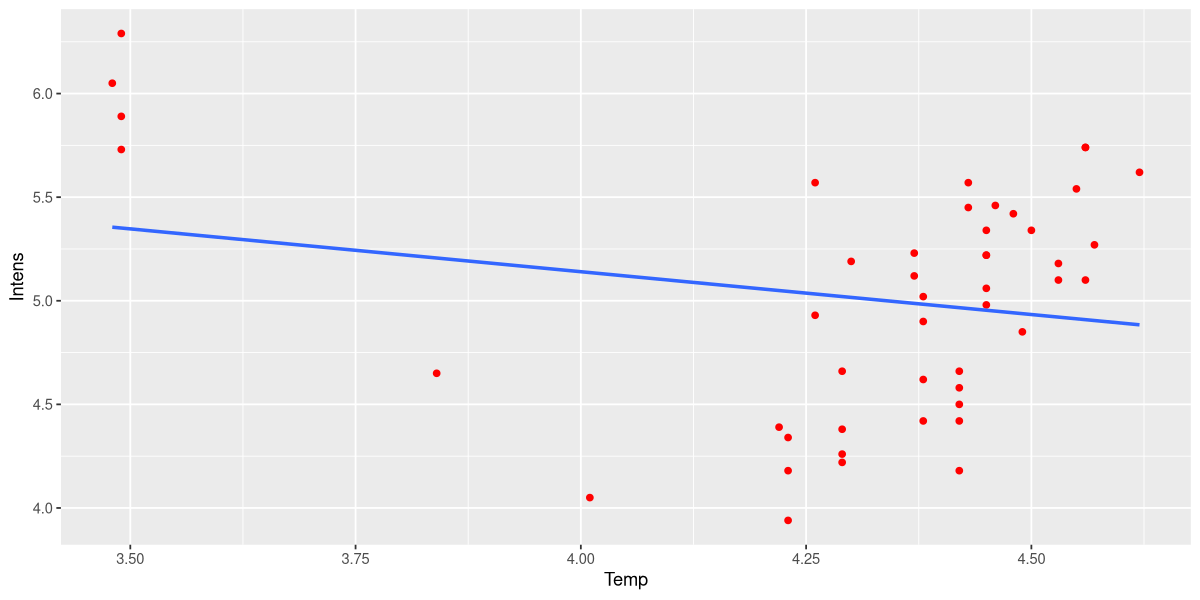

In [11]:
reg <- lm(Intens~Temp, data=star)
coef <- reg$coef
cat("Recta de mínimos cuadrados: Intens =", coef[[1]], coef[[2]], "* Temp")
ggplot(star, aes(x=Temp, y=Intens)) +
    geom_point(col="red") +
    geom_smooth(formula=y~x,method="lm", se=F)

Gráficamente, el ajuste parece no ser demasiado bueno.

**b)** En lugar de mínimos cuadrados, otro criterio posible para ajustar una regresión es encontrar la recta que minimiza la mediana de los residuos al cuadrado. Calcula la recta de mínima mediana de cuadrados para los datos de las estrellas. Representa gráficamente la nube de puntos junto con la recta obtenida.

Recta de mínimos cuadrados: Intens = -12.76 + 4 * Temp

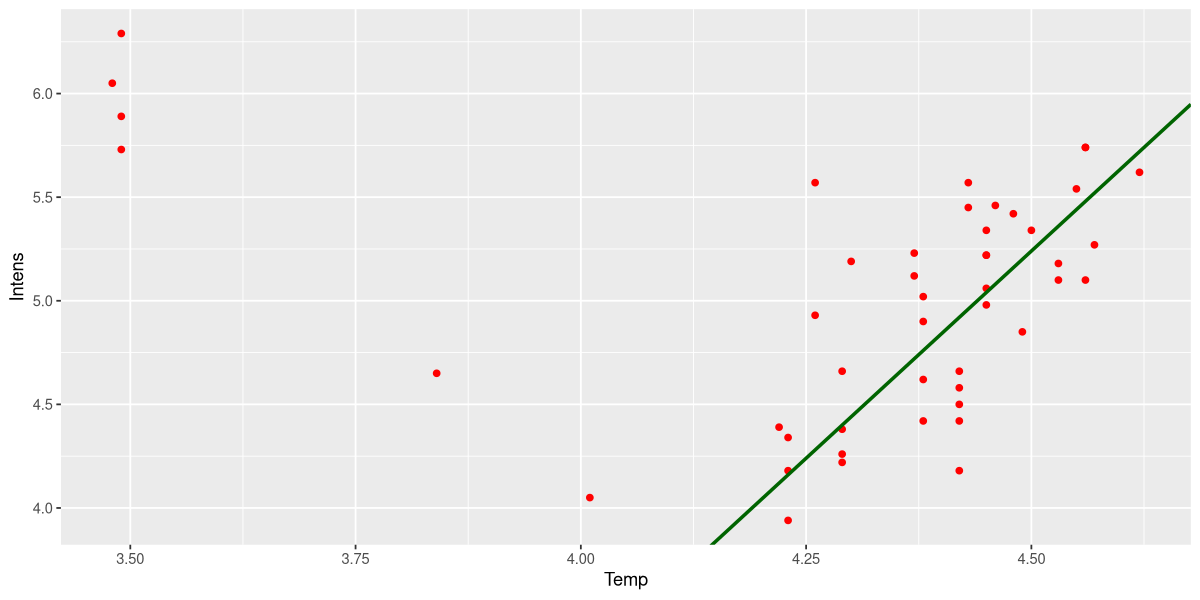

In [12]:
msreg <- MASS::lmsreg(Intens~Temp, data=star)
mscoef <- msreg$coef
cat("Recta de mínimos cuadrados: Intens =", mscoef[[1]], "+", mscoef[[2]], "* Temp")
ggplot(star, aes(x=Temp, y=Intens)) +
    geom_point(col="red") +
    geom_abline(slope = mscoef[[2]], intercept=mscoef[[1]], size=1, color="darkgreen")

Vemos que, aunque sea gráficamente, esta recta parece ajustarse mejor a la nube de puntos. Una posible explicación es que la mediana es más robusta a *outliers* que la media, y como vemos en el gráfico tenemos algunos puntos aislados que podrían considerarse *outliers*.

**c)** Usa el método bootstrap para calcular el error típico de la pendiente de la recta de mínima mediana de cuadrados para los datos de las estrellas. ¿Qué problema presenta el método bootstrap para este conjunto de datos en concreto?

Partiendo de la muestra original que tenemos, en cada iteración bootstrap remuestreamos de los residuos para estimar la distribución de los errores, y con esta estimación calculamos el valor *bootstrap* de la variable de respuesta, $Intens_{boot}$. Después ajustamos la recta de mínima mediana de cuadrados al $(Intens_{boot}, Temp)$, y finalmente obtenemos su pendiente.

In [13]:
set.seed(42)
R <- 1000
n <- nrow(star)
x <- star[, 1]
beta0_hat <- mscoef[[1]]
beta1_hat <- mscoef[[2]]
residuos <- residuals(msreg)

beta1_boot <- NULL
for (i in 1:R){
  epsilon_boot <- sample(residuos, n, rep = TRUE)
  y_boot <- beta0_hat + beta1_hat*x + epsilon_boot
  beta1_boot[i] <- coefficients(MASS::lmsreg(y_boot ~ x))[2]
}
cat("Error típico pendiente de recta de mínima mediana de cuadrados:", sd(beta1_boot))

Error típico pendiente de recta de mínima mediana de cuadrados: 0.5085784

Un posible problema de este método para este conjunto de datos en concreto es la presencia de *outliers*. Como solo tenemos una muestra y estamos remuestreando los residuos, es posible que muchas de las remuestras cojan el error de los outliers a la recta, el cual será muy elevado. Como tenemos una proporción relativamente alta de *outliers* (a simple vista unos 5 o 6 de un total de 47, es decir, en torno a un 10% de las observaciones), cabe la posibilidad de que la estimación final del error no sea muy buena, al estar "contaminada" por estos errores excesivamente grandes en un número no despreciable de las remuestras.

## Relación 3.2: selección de variables y regularización

### Ejercicio 1

Selección de variables con datos simulados.


- Genera aleatoriamente una variable regresora $X$ y un vector aleatorio $\epsilon$ de longitud $n=100$, con distribución normal estándar e independientes.

In [14]:
set.seed(42)
n <- 100
X <- rnorm(100)
eps <- rnorm(100, sd=1.5)

- Genera la variable respuesta de acuerdo con el modelo
$$Y=X+X^2+X^3+\epsilon.$$

In [15]:
Y <- X + X**2 + X**3 + eps

- Selecciona el modelo óptimo entre todos los submodelos que contienen como variables regresoras $X,X^2,X^3,\dots,X^{10}$. ¿Cuál es el mejor modelo de acuerdo con los criterios $C_p$, BIC y $R^2_a$?

En primer lugar ajustamos todos los modelos que contienen las variables $X, \dots, X^k$, para $k=1,\dots,10$, y nos quedamos en cada caso con el que mayor $R^2$ tenga.

In [16]:
data <- data.frame(y=Y, x1=X, x2=X**2, x3=X**3, x4=X**4, 
                   x5=X**5, x6=X**6, x7=X**7, x8=X**8, 
                   x9=X**9, x10=X**10)

# Elegimos el mejor modelo con $k$ variables para k=1,..,10
# (en función de R^2)
modelo_todos <- leaps::regsubsets(y ~ ., data=data, nvmax=10)
resumen_todos <- summary(modelo_todos)
resumen_todos$outmat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1 ( 1 ),,,*,,,,,,,
2 ( 1 ),,,*,*,,,,,,
3 ( 1 ),,*,*,,*,,,,,
4 ( 1 ),,*,*,,,,*,,*,
5 ( 1 ),*,*,,,*,,*,,*,
6 ( 1 ),,,*,*,,*,,*,*,*
7 ( 1 ),*,*,,,*,*,*,*,*,
8 ( 1 ),*,,,*,*,*,*,*,*,*
9 ( 1 ),*,*,,*,*,*,*,*,*,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


Cada fila representa un valor de $k$, donde las variables elegidas para el modelo óptimo son las que tienen un $\ast$.

Podemos ver ahora cuál de los $10$ modelos es el mejor, en función de los distintos criterios.

In [17]:
mej <- data.frame(
  Adj.R2 = which.max(resumen_todos$adjr2),
  CP = which.min(resumen_todos$cp),
  BIC = which.min(resumen_todos$bic)
)
cat("Mejor modelo según R^2 ajustado:\n")
resumen_todos$outmat[mej[[1]],]
cat("Mejor modelo según Cp:\n")
resumen_todos$outmat[mej[[2]],]
cat("Mejor modelo según BIC:\n")
resumen_todos$outmat[mej[[3]],]

Mejor modelo según R^2 ajustado:


x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
"*" "*" " " " " "*" "*" "*" "*" "*" " "

Mejor modelo según Cp:


x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
" " " " "*" "*" " " "*" " " "*" "*" "*"

Mejor modelo según BIC:


x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
"*" "*" " " " " "*" " " "*" " " "*" " "

Es decir, los mejores modelos según cada criterio son:

**Según $R^2_a$**:
$Y=X+X^2+X^5+X^6+X^7+X^8+X^9$.

**Según $C_p$**:
$Y=X^3+X^4+X^6+X^8+X^9+X^{10}$.

**Según $BIC$**:
$Y=X+X^2+X^5+X^7+X^9$.

- Repite el apartado anterior usando el método iterativo hacia delante.

In [18]:
modelo_todos_f <- leaps::regsubsets(y ~ ., data=data, nvmax=10, method='forward')
resumen_todos_f <- summary(modelo_todos_f)
resumen_todos_f$outmat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1 ( 1 ),,,*,,,,,,,
2 ( 1 ),,,*,*,,,,,,
3 ( 1 ),*,,*,*,,,,,,
4 ( 1 ),*,*,*,*,,,,,,
5 ( 1 ),*,*,*,*,*,,,,,
6 ( 1 ),*,*,*,*,*,,,,*,
7 ( 1 ),*,*,*,*,*,,*,,*,
8 ( 1 ),*,*,*,*,*,,*,,*,*
9 ( 1 ),*,*,*,*,*,*,*,,*,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


In [19]:
mej_f <- data.frame(
  Adj.R2 = which.max(resumen_todos_f$adjr2),
  CP = which.min(resumen_todos_f$cp),
  BIC = which.min(resumen_todos_f$bic)
)
cat("Mejor modelo según R^2 ajustado:\n")
resumen_todos_f$outmat[mej_f[[1]],]
cat("Mejor modelo según Cp:\n")
resumen_todos_f$outmat[mej_f[[2]],]
cat("Mejor modelo según BIC:\n")
resumen_todos_f$outmat[mej_f[[3]],]

Mejor modelo según R^2 ajustado:


x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
"*" "*" "*" "*" "*" " " "*" " " "*" "*"

Mejor modelo según Cp:


x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
"*" "*" "*" "*" "*" " " "*" " " "*" "*"

Mejor modelo según BIC:


x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 
"*" "*" "*" "*" "*" " " "*" " " "*" " "

Es decir, utilizando el método iterativo hacia delante, los mejores modelos según cada criterio son:

**Según $R^2_a$**:
$Y=X+X^2+X^3+X^4+X^5+X^7+X^9+X^{10}$.

**Según $C_p$**:
$Y=X+X^2+X^3+X^4+X^5+X^7+X^9+X^{10}$.

**Según $BIC$**:
$Y=X+X^2+X^3+X^4+X^5+X^7+X^9$.

En este caso los mejores modelos seleccionados según los tres criterios son muy parecidos (incluso iguales para $R_a^2$ y $C_p$).

 - Aplica ahora Lasso al modelo que incluye las variables regresoras $X,X^2,\dots,X^{10}$. Selecciona el parámetro de regularización mediante validación cruzada y compara los resultados del ajuste con los de los apartados anteriores.

In [20]:
x <- as.matrix(data[, -1])
y <- data[,1]
lasso_cv <- cv.glmnet(x, y, alpha = 1) 
lambda.lasso <- lasso_cv$lambda.1se
modelo_final_lasso <- glmnet(x, y, alpha = 1, lambda = lambda.lasso)
cat("Lambda elegido:", lambda.lasso)
coef(modelo_final_lasso)

Lambda elegido: 0.3585335

11 x 1 sparse Matrix of class "dgCMatrix"
                   s0
(Intercept) 0.3171294
x1          1.1488273
x2          0.5006932
x3          0.8037482
x4          .        
x5          .        
x6          .        
x7          .        
x8          .        
x9          .        
x10         .        

Vemos que el modelo elegido por Lasso tan solo considera significativas las tres primeras variables, es decir, $X,X^2$y $X^3$. En este caso ha conseguido acertar las variables con las que ha sido construido el modelo. No ocurría así en el apartado anterior, donde el mejor modelo siempre tenía, como mínimo, 5 variables.

Podemos hacer algunas comparaciones sobre la bondad del ajuste. Por ejemplo, calculamos el coeficiente $R^2$ ajustado para los mejores modelos según este criterio del apartado anterior, y los comparamos con el valor de esa misma métrica para la regresión con Lasso.

In [21]:
p <- 3
var_res <- sum((y - predict(modelo_final_lasso, x, type="response"))**2) / (n-p-1)

data.frame(
    mejor_exhaustive_adjr2 = resumen_todos$adjr2[mej[[1]]],
    mejor_forward_adjr2 = resumen_todos_f$adjr2[mej_f[[1]]],
    mejor_lasso_adjr2 = 1-var_res/var(y))

mejor_exhaustive_adjr2,mejor_forward_adjr2,mejor_lasso_adjr2
<dbl>,<dbl>,<dbl>
0.9356795,0.9348397,0.8974144


Vemos que el coeficiente $R^2$ ajustado es ligeramente menor para el modelo de Lasso, aunque sabemos que este es el mejor modelo de todos.

- Genera ahora las respuestas a partir del modelo $$Y=X^7+\epsilon$$ y aplica de nuevo el método Lasso.

In [22]:
yy <- X**7 + eps
lasso_cv_2 <- cv.glmnet(x, yy, alpha = 1) 
lambda.lasso_2 <- lasso_cv_2$lambda.1se
modelo_final_lasso_2 <- glmnet(x, yy, alpha = 1, lambda = lambda.lasso_2)
cat("Lambda elegido:", lambda.lasso_2)
coef(modelo_final_lasso_2)

Lambda elegido: 9.447302

11 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) -1.5172391
x1           .        
x2           .        
x3           .        
x4           .        
x5           .        
x6           .        
x7           0.9613589
x8           .        
x9           .        
x10          .        

Vemos que de nuevo el método de regularización Lasso ha conseguido encontrar el modelo real, pues considera que tan solo la variable $X^7$ es significativa.

### Ejercicio 2

Datos de consumo de combustible en EE.UU. 

Los datos `fuel2001` en el fichero `combustible.RData` corresponden al consumo de combustible (y otras variables relacionadas) en EE.UU. Se desea explicar la variable `FuelC` en función del resto de la información.

In [23]:
datos <- 'http://verso.mat.uam.es/~joser.berrendero/datos/combustible.RData'
load(url(datos))
head(fuel2001)

,Drivers,FuelC,Income,Miles,MPC,Pop,Tax
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
AL,3559897,2382507,23471,94440,12737.00,3451586,18.0
AK,472211,235400,30064,13628,7639.16,457728,8.0
AZ,3550367,2428430,25578,55245,9411.55,3907526,18.0
AR,1961883,1358174,22257,98132,11268.40,2072622,21.7
CA,21623793,14691753,32275,168771,8923.89,25599275,18.0
CO,3287922,2048664,32949,85854,9722.73,3322455,22.0


- Representa en un plano las dos primeras componentes principales de estos datos estandarizados. ¿Son suficientes estas dos componentes para explicar un alto porcentaje de la varianza?

In [24]:
pc <- prcomp(fuel2001, rank.=2, scale.=T, center=T)
summary(pc)

Importance of first k=2 (out of 7) components:
                          PC1    PC2
Standard deviation     1.9182 1.2664
Proportion of Variance 0.5256 0.2291
Cumulative Proportion  0.5256 0.7547

Como vemos, las dos primeras componentes principales son capaces de explicar el 75% de la varianza de los datos. Aunque es un valor alto, dependiendo de la aplicación concreta y de la información que tengamos sobre los datos podría no ser suficiente; sería deseable poder explicar un porcentaje más alto, en torno al 90% de la varianza.

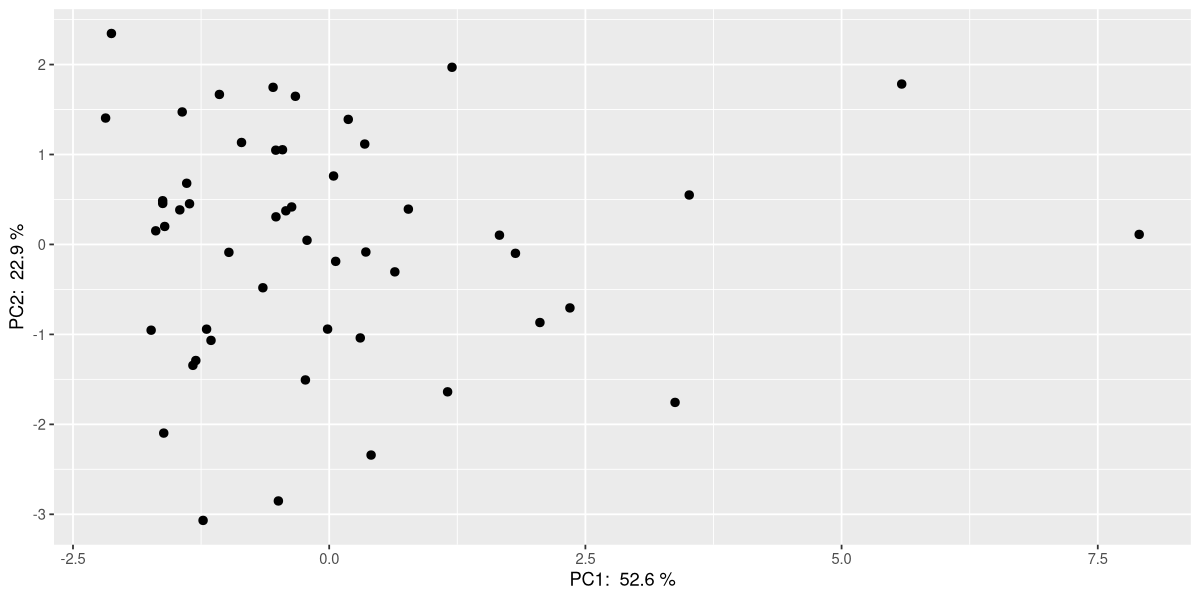

In [25]:
var_explained <- pc$sdev^2/sum(pc$sdev^2)
ggplot(as.data.frame(pc$x), aes(x=PC1,y=PC2)) + 
    geom_point(size=2) +
    labs(x=paste("PC1: ",round(var_explained[1]*100,1),"%"),
         y=paste("PC2: ",round(var_explained[2]*100,1),"%"))

- Ajusta el modelo completo con todas las variables. En este modelo completo, contrasta la hipótesis nula de que los coeficientes de las variables `Income`, `MPC` y `Tax` son simultáneamente iguales a cero.

Ajustamos primero el modelo completo, y después un modelo reducido sin las variables `Income`, `MPC` y `Tax`. Calculamos la tabla de análisis de la varianza entre estos dos modelos, y en función del $p$-valor obtenido contrastamos la hipótesis nula. 

In [26]:
reg <- lm(FuelC~., data=fuel2001)
reg0 <- lm(FuelC~Drivers + Miles + Pop, data=fuel2001)
anova(reg0, reg)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47,7.855597e+12,NA,NA,NA,NA
2,44,6.984313e+12,3,871284719267,1.829649,0.1556908


Si fijamos por ejemplo un nivel $\alpha=0.05$, no tenemos evidencia para rechazar la hipótesis nula, ya que el $p$-valor obtenido es $\approx 0.16 > \alpha$.

- De acuerdo con el método iterativo hacia adelante y el criterio BIC, ¿cuál es el modelo óptimo?

In [27]:
fuel_todos <- leaps::regsubsets(FuelC ~ ., data=fuel2001, nvmax=6, method='forward')
fuel_todos.res <- summary(fuel_todos)
fuel_todos.res$outmat[which.min(fuel_todos.res$bic), ]

Drivers  Income   Miles     MPC     Pop     Tax 
    "*"     " "     "*"     " "     " "     "*"

El mejor modelo según estos criterios es:
$$FuelC = \beta_0 + \beta_1 Drivers + \beta_2 Miles + \beta_3 Tax.$$

 - Ajusta el modelo usando Lasso, con el parámetro de regularización seleccionado mediante validación cruzada.

In [28]:
x <- as.matrix(fuel2001[, -2])
y <- fuel2001[, 2]
lasso_cv <- cv.glmnet(x, y, alpha = 1) 
lambda.lasso <- lasso_cv$lambda.1se
modelo_final_lasso <- glmnet(x, y, alpha = 1, lambda = lambda.lasso)
cat("Lambda elegido:", lambda.lasso)
coef(modelo_final_lasso)

Lambda elegido: 194445.6

7 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 6.187323e+04
Drivers     5.826975e-01
Income      .           
Miles       3.816957e+00
MPC         .           
Pop         .           
Tax         .           

Vemos que el modelo ajustado con Lasso solo ha retenido las variables `Drivers` y `Miles`.

- Ajusta el modelo usando Ridge, con el parámetro de regularización seleccionado mediante validación cruzada.

In [29]:
ridge_cv <- cv.glmnet(x, y, alpha = 0) 
lambda.ridge <- ridge_cv$lambda.1se
modelo_final_ridge <- glmnet(x, y, alpha = 0, lambda = lambda.ridge)
cat("Lambda elegido:", lambda.ridge)
coef(modelo_final_ridge)

Lambda elegido: 803451.7

7 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  1.341364e+05
Drivers      2.549465e-01
Income       1.956565e+01
Miles        9.065070e+00
MPC         -6.578694e-01
Pop          2.058081e-01
Tax         -3.345762e+04

En este caso se retienen todas las variables del modelo (la regularización $L_2$ no aporta *sparsity* en general).